https://www.kaggle.com/datasets/cocolicoq4/employee-churn-at-dunder-mifflin-paper-company

#### Importação das bibliotecas

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

##### Leitura do dataframe

In [2]:
df = pd.read_csv('data/office_churn_dataset.csv')
df.head()

,EmployeeID,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1543 non-null   int64  
 1   Branch                   1535 non-null   object 
 2   Tenure                   1534 non-null   float64
 3   Salary                   1534 non-null   float64
 4   Department               1543 non-null   object 
 5   JobSatisfaction          1515 non-null   float64
 6   WorkLifeBalance          1515 non-null   float64
 7   CommuteDistance          1543 non-null   object 
 8   MaritalStatus            1543 non-null   object 
 9   Education                1543 non-null   object 
 10  PerformanceRating        1536 non-null   float64
 11  TrainingHours            1352 non-null   float64
 12  OverTime                 1443 non-null   object 
 13  NumProjects              1444 non-null   float64
 14  YearsSincePromotion     

In [4]:
#df['Tenure'].astype('object')

In [5]:
#df.to_excel('data/office_churn_dataset.xlsx', index = False)

In [6]:
#df = pd.read_excel(io = 'data/office_churn_dataset.xlsx')
#df.info()

In [7]:
colunas = {
    'EmployeeID' : 'id',
    'Branch' : 'filial',
    'Tenure' : 'tempo_funcionario',
    'Salary' : 'salario_anual',
    'Department' : 'setor',
    'JobSatisfaction' : 'satisfacao_trabalho',
    'WorkLifeBalance' : 'balanco_vida_trabalho',
    'CommuteDistance' : 'distancia_trabalho',
    'MaritalStatus' : 'estado_civil',
    'Education' : 'escolaridade',
    'PerformanceRating' : 'avaliacao_performance',
    'TrainingHours' : 'horas_treinamento',
    'OverTime' : 'horas_extras',
    'NumProjects' : 'qtd_projetos',
    'YearsSincePromotion' : 'anos_ult_promocao',
    'EnvironmentSatisfaction' : 'satisfacao_ambiente',
    'ChurnLikelihood' : 'churn_probabilidade' 
}

In [8]:
df.rename(
    columns = colunas,
    inplace = True
)
df.head()

,id,filial,tempo_funcionario,salario_anual,setor,satisfacao_trabalho,balanco_vida_trabalho,distancia_trabalho,estado_civil,escolaridade,avaliacao_performance,horas_treinamento,horas_extras,qtd_projetos,anos_ult_promocao,satisfacao_ambiente,churn_probabilidade
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


In [9]:
df.shape

(1543, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1543 non-null   int64  
 1   filial                 1535 non-null   object 
 2   tempo_funcionario      1534 non-null   float64
 3   salario_anual          1534 non-null   float64
 4   setor                  1543 non-null   object 
 5   satisfacao_trabalho    1515 non-null   float64
 6   balanco_vida_trabalho  1515 non-null   float64
 7   distancia_trabalho     1543 non-null   object 
 8   estado_civil           1543 non-null   object 
 9   escolaridade           1543 non-null   object 
 10  avaliacao_performance  1536 non-null   float64
 11  horas_treinamento      1352 non-null   float64
 12  horas_extras           1443 non-null   object 
 13  qtd_projetos           1444 non-null   float64
 14  anos_ult_promocao      1542 non-null   float64
 15  sati

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1543.0,772.000000,445.570047,1.000000,386.500000,772.000000,1157.500000,1543.000000
tempo_funcionario,1534.0,7.612125,4.123834,0.000000,5.000000,7.000000,10.000000,27.000000
salario_anual,1534.0,66654.498044,8473.622168,40000.000000,61000.000000,66500.000000,72375.000000,98000.000000
satisfacao_trabalho,1515.0,3.421782,1.095047,1.000000,3.000000,3.000000,4.000000,5.000000
balanco_vida_trabalho,1515.0,3.770770,0.481407,2.000000,3.500000,4.000000,4.000000,5.000000
avaliacao_performance,1536.0,3.493310,0.411208,1.639834,3.333333,3.363192,3.666667,5.000000
horas_treinamento,1352.0,34.645646,22.970267,5.196002,18.000000,30.000000,40.000000,96.000000
qtd_projetos,1444.0,3.500687,0.714107,1.505266,3.000000,3.618543,4.000000,6.394718
anos_ult_promocao,1542.0,1.203632,2.059476,0.000000,0.000000,0.000000,2.000000,16.000000
satisfacao_ambiente,1515.0,2.521421,0.691325,1.000000,2.000000,2.780499,3.000000,5.000000


In [12]:
filial_count = df['filial'].value_counts()
filial_perc = df['filial'].value_counts(normalize = True)
filial = pd.DataFrame({'qtd_func' : filial_count, '(%) do total' : round(filial_perc * 100, 1)})
filial.head()

,qtd_func,(%) do total
filial,,
Los Angeles,181,11.8
New York,180,11.7
Scranton,179,11.7
Philadelphia,166,10.8
Boston,165,10.7


In [13]:
churn_probabilidade_count = df['churn_probabilidade'].value_counts()
churn_probabilidade_perc = df['churn_probabilidade'].value_counts(normalize = True)
churn_probabilidade = pd.DataFrame({'qtd_func' : churn_probabilidade_count, '(%) do total' : round(churn_probabilidade_perc * 100, 1)})
churn_probabilidade

,qtd_func,(%) do total
churn_probabilidade,,
Highly Likely to Churn,884,57.3
Moderately Likely to Churn,627,40.6
Slightly Likely to Churn,32,2.1


In [14]:
df_scranton = df[df['filial'] == 'Scranton']
df_scranton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 3 to 1522
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     179 non-null    int64  
 1   filial                 179 non-null    object 
 2   tempo_funcionario      178 non-null    float64
 3   salario_anual          179 non-null    float64
 4   setor                  179 non-null    object 
 5   satisfacao_trabalho    176 non-null    float64
 6   balanco_vida_trabalho  176 non-null    float64
 7   distancia_trabalho     179 non-null    object 
 8   estado_civil           179 non-null    object 
 9   escolaridade           179 non-null    object 
 10  avaliacao_performance  179 non-null    float64
 11  horas_treinamento      155 non-null    float64
 12  horas_extras           170 non-null    object 
 13  qtd_projetos           169 non-null    float64
 14  anos_ult_promocao      179 non-null    float64
 15  satisfacao

In [15]:
churn_probabilidade_count_scranton = df_scranton['churn_probabilidade'].value_counts()
churn_probabilidade_perc_scranton = df_scranton['churn_probabilidade'].value_counts(normalize = True)
churn_probabilidade_scranton = pd.DataFrame({'qtd_func' : churn_probabilidade_count_scranton, '(%) do total' : round(churn_probabilidade_perc_scranton * 100, 1)})
churn_probabilidade_scranton

,qtd_func,(%) do total
churn_probabilidade,,
Moderately Likely to Churn,90,50.3
Highly Likely to Churn,83,46.4
Slightly Likely to Churn,6,3.4


C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tempo_funcionario', ylabel='Count'>

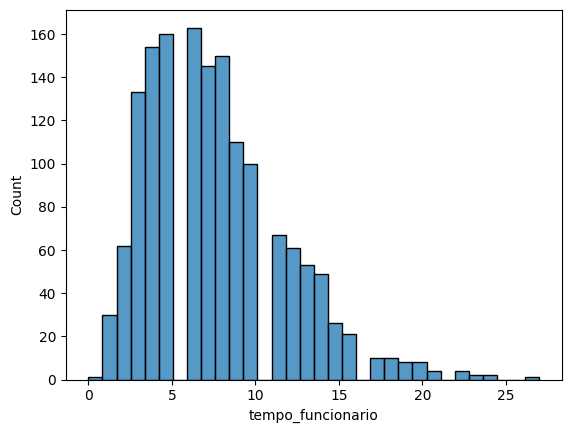

In [25]:
sns.histplot(data = df, x = df['tempo_funcionario']
             #, stat = 'count', bins = 10
             )

In [ ]:
sns.histplot(data = df, x = df['salario_anual'], stat = 'count', bins = 10)